## **Import Libarary yang dibutuhkan**

In [141]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler

## **Load Dataset yang telah diupload di Github**

In [142]:
url = "https://raw.githubusercontent.com/elfarian/elfarian-blog/master/Walmart.csv"
df = pd.read_csv(url)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## **Cleaning Data**

Pengecekan dataset, apakah terdapat missing value

In [143]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Setelah di cek ternyata tidak terdapat missing value pada dataset tersebut.

Sehingga selanjutnya mencoba cleaning data dengan menghapus outlier

In [144]:
z_scores = stats.zscore(df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]])
abs_z_scores = np.abs(z_scores)
filtered = (abs_z_scores < 3).all(axis=1)
df = df[filtered]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Dari 6435 baris setelah di hilangkan outliernya tersisa baris kolom.

## **Eksplorasi Data Analisis**

Mencoba memparse kolom Date di dataset menjadi tanggal, bulan, tahun dan hari.

In [145]:
# Membuat fungsi untuk memparse Date
def parse_tanggal(row):
  date = row['Date']
  x = date.split("-")
  tanggal = x[0]
  bulan = x[1]
  tahun = x[2]
  hari = datetime.datetime(day=int(tanggal), month=int(bulan), year=int(tahun)).strftime('%A')
  return pd.Series([int(tanggal), int(bulan), int(tahun), hari])


In [146]:
# memanggil fungsi
df[["tanggal", "bulan", "tahun", "hari"]] = df.apply(parse_tanggal, axis=1) 
# Menghapus kolom Date karena sudah di parsingkan
df = df.drop("Date", axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,tanggal,bulan,tahun,hari
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,Friday
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,Friday
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Friday
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Friday
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,Friday


Pengecekan variasi pada kolom hari, tanggal, bulan dan tahun

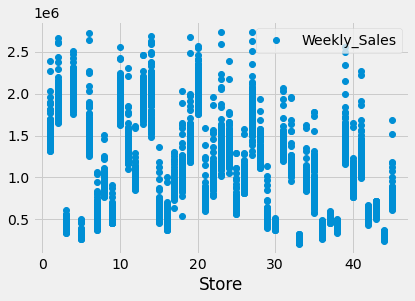

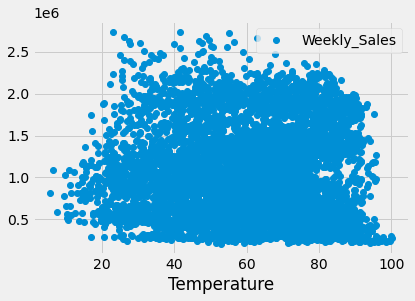

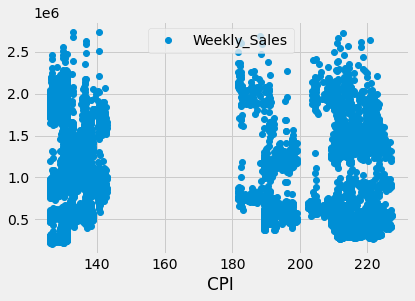

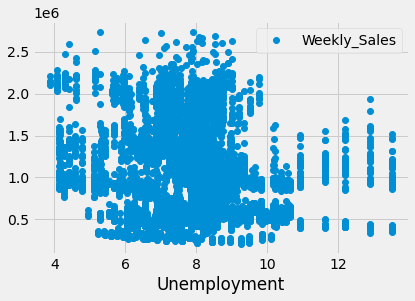

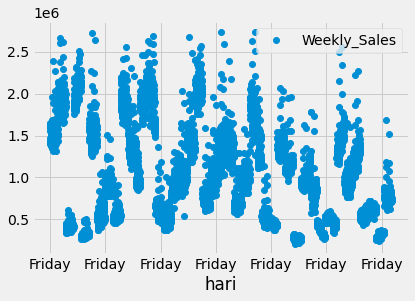

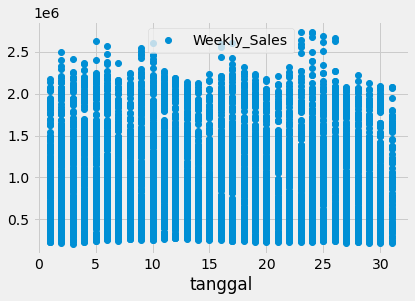

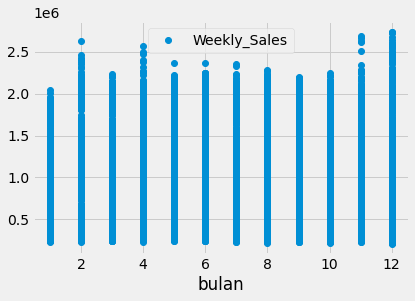

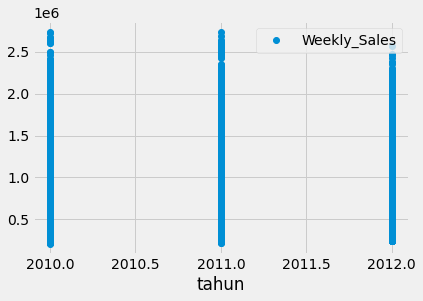

In [147]:
df.plot(x="Store", y="Weekly_Sales", style='o')
df.plot(x="Temperature", y="Weekly_Sales", style='o')
df.plot(x="CPI", y="Weekly_Sales", style='o')
df.plot(x="Unemployment", y="Weekly_Sales", style='o')
df.plot(x="hari", y="Weekly_Sales", style='o')
df.plot(x="tanggal", y="Weekly_Sales", style='o')
df.plot(x="bulan", y="Weekly_Sales", style='o')
df.plot(x="tahun", y="Weekly_Sales", style='o')

Setelah dicek ternyata data kolom hari tersebut hanya terdapat hari jumat sehingga tidak perlu digunakan untuk dijadikan parameter.

Untuk kolom tanggal terdapat 31 variasi sehingga masih mungkin dapat digunakan menjadi parameter.

Untuk kolom tahun terdapat 3 variasi yaitu tahun 2010, 2011 dan 2012. 

In [148]:
# drop kolom hari
df = df.drop("hari", axis=1)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,tanggal,bulan,tahun
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


Melakukan pengecekan data Weekly sales berdasarkan tahun

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


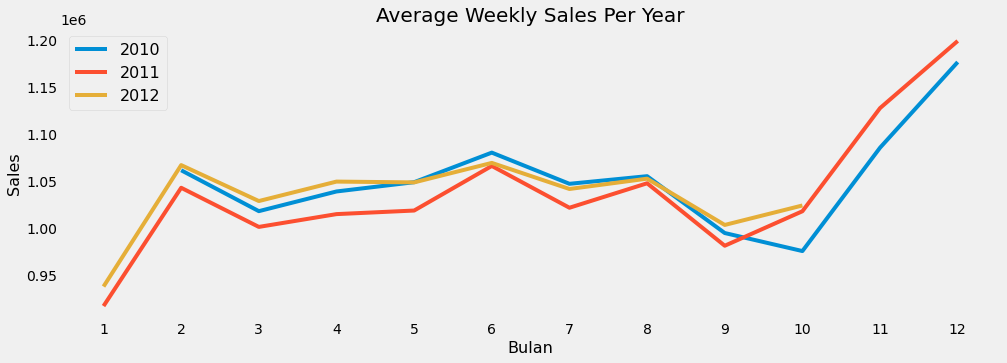

In [149]:
weekly_sales_2010 = df[df['tahun']==2010]['Weekly_Sales'].groupby(df['bulan']).mean()
weekly_sales_2011 = df[df['tahun']==2011]['Weekly_Sales'].groupby(df['bulan']).mean()
weekly_sales_2012 = df[df['tahun']==2012]['Weekly_Sales'].groupby(df['bulan']).mean()

plt.figure(figsize=(15,5))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,13, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Bulan', fontsize=16)
plt.show()

Dari grafik diatas didapatkan insight bahwa setiap tahun untuk setiap bulan pola weekly sales yang didapat tidak jauh berbeda. Sehingga kolom tahun tidak perlu di masukan menjadi parameter, tetapi kolom bulan masih perlu dibutuhkan.

Selain itu juga dilakukan analisa menggunakan HeatMap

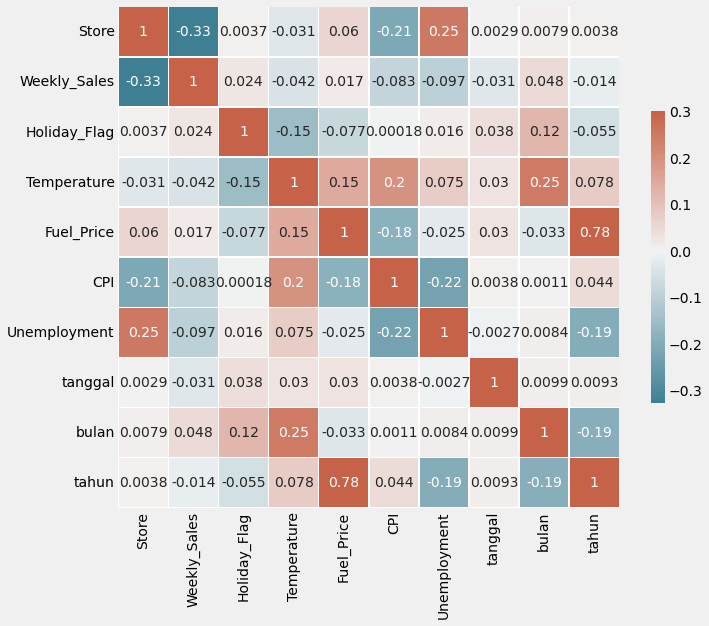

In [150]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Dari Heatmap diatas dapat diketahui bahwa kolom tahun tidak terlalu berpengaruh terhadap weekly sales dengan nilai -0.014. Kemudian juga kolom Fuel Price dirasa tidak berpengaruh banyak karena nilainya adalah 0.017 untuk kolom weekly sales.

Yang paling memberikan pengaruh besar yaitu kolom Store dengan nilai -0.33

Sehingga selanjutnya menghapus kolom Tahun dan Fuel_Price karena dirasa tidak perlu.

In [151]:
df = df.drop(["tahun", "Fuel_Price"], axis=1)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,tanggal,bulan
0,1,1643690.90,0,42.31,211.096358,8.106,5,2
1,1,1641957.44,1,38.51,211.242170,8.106,12,2
2,1,1611968.17,0,39.93,211.289143,8.106,19,2
3,1,1409727.59,0,46.63,211.319643,8.106,26,2
4,1,1554806.68,0,46.50,211.350143,8.106,5,3


## **ONE HOT ENCODING**

Selanjutnya yaitu melakukan one hot encoding dengan memecah kolom store menjadi beberapa kolom. Kolom store saat ini berisi angka dari 1 hingga 45 yang merupakan kode toko dari Walmart. Selanjutnya akan memecahnya menjadi beberapa kolom.

In [152]:
# Membuat fungsi onehotencode
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [153]:
df = onehot_encode(df, column='Store', prefix='store')
df.head()

,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,tanggal,bulan,store_1,store_2,store_3,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1643690.90,0,42.31,211.096358,8.106,5,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,211.242170,8.106,12,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,211.289143,8.106,19,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,211.319643,8.106,26,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,211.350143,8.106,5,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## **SCALLING**

Pada tahap ini melakukan scalling untuk membagi dataset yang ada kedalam train dan testing.

In [154]:
y = df['Weekly_Sales'].copy()
X = df.drop(['Weekly_Sales'], axis=1).copy()

Pada kali ini kami tidak menggunakan standard scaller

In [155]:
# scaler = StandardScaler()

# X = scaler.fit_transform(X)

In [156]:
# Kami membagi testing sebanyak 25% dari data keseluruhan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Mencoba melakukan training dengan menggunakan metode Linier Regression

Intercept:  1382078.246955446


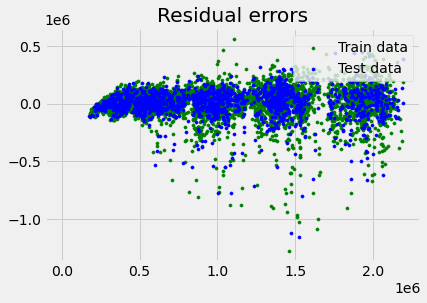

In [157]:
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

# regression intercept
print('Intercept: ', reg.intercept_)
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [158]:
print("Linier Regression Accuracy:", reg.score(X_test, y_test))

Linier Regression Accuracy: 0.9429296645802211


Didapatkan untuk metode linier regresi mendapatkan akurasi sebesar 94,2929%

In [159]:
# Melihat hasil prediksi dan membandingkannya dengan data testing
y_pred = reg.predict(X_test)
dataframe = pd.DataFrame({'Data sebenarnya': y_test, 'Data prediksi': y_pred})
dataframe

,Data sebenarnya,Data prediksi
2705,1408907.89,1.429685e+06
6336,1002364.34,8.955429e+05
560,2193367.69,2.098529e+06
695,327383.64,3.026062e+05
1838,2182437.90,1.965775e+06
...,...,...
1410,1811562.88,1.835200e+06
4473,1141019.11,1.229475e+06
4309,1368090.08,1.360123e+06
4708,270097.76,2.750574e+05


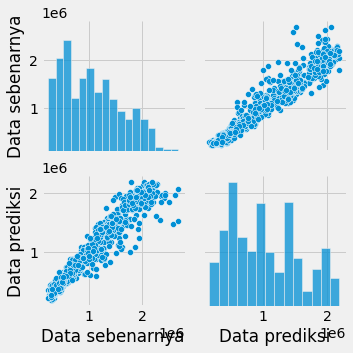

In [160]:
sns.pairplot(dataframe)

## **Cek Error Model**

In [161]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [162]:
# MAE MSE RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('MAE: %.5f' % (mae))
print('MSE: %.5f' % (mse))
print('RMSE: %.5f' % (rmse))

MAE: 84810.27701
MSE: 17374052757.05791
RMSE: 131810.67012


## **Mencoba melakukan Improvment terhadap Model**

## **Feature Important**

Pada tahap ini melihat parameter apa aja yang penting dan tidak penting.

In [163]:
importance = reg.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 43401.10001
Feature: 1, Score: -1148.73256
Feature: 2, Score: -959.75408
Feature: 3, Score: -20812.87226
Feature: 4, Score: -1474.53948
Feature: 5, Score: 12193.35696
Feature: 6, Score: 547715.52073
Feature: 7, Score: 912684.14395
Feature: 8, Score: -591839.42852
Feature: 9, Score: 939583.28375
Feature: 10, Score: -702595.44581
Feature: 11, Score: 557317.44478
Feature: 12, Score: -460267.69331
Feature: 13, Score: -126319.85567
Feature: 14, Score: -482395.96357
Feature: 15, Score: 783038.97180
Feature: 16, Score: 373070.74235
Feature: 17, Score: 33724.19206
Feature: 18, Score: 850677.05806
Feature: 19, Score: 954045.75655
Feature: 20, Score: -461552.39136
Feature: 21, Score: -543344.24702
Feature: 22, Score: -234023.05833
Feature: 23, Score: 9018.51754
Feature: 24, Score: 353432.59385
Feature: 25, Score: 1047508.37891
Feature: 26, Score: -241790.90995
Feature: 27, Score: -65781.95950
Feature: 28, Score: 230138.06110
Feature: 29, Score: 286292.62727
Feature: 30, Score:

Setelah di cek ternyata dari 50 Feature tersebut semuanya important karena tidak ada nilai yang mendekati 0

## **Mencoba Model Lainnya**

## **Random Forest Regression**

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [166]:
print("Random Forest Regression Accuracy:", regressor.score(X_test, y_test))

Random Forest Regression Accuracy: 0.9643661636063481


Dengan data train dan testing yang sama, dengan menggunakan random forest regression didapat akurasinya 96,436%

In [167]:
# Melihat hasil prediksi dan membandingkannya dengan data testing
y_pred_regression = regressor.predict(X_test)
dataframe_rfr = pd.DataFrame({'Data sebenarnya': y_test, 'Data prediksi': y_pred_regression})
dataframe_rfr

,Data sebenarnya,Data prediksi
2705,1408907.89,1396690.121
6336,1002364.34,1013975.810
560,2193367.69,2214108.577
695,327383.64,329635.410
1838,2182437.90,2096609.750
...,...,...
1410,1811562.88,1806591.649
4473,1141019.11,1190956.229
4309,1368090.08,1328274.331
4708,270097.76,264145.127


In [168]:
# MAE MSE RMSE
rfr_mae = mean_absolute_error(y_test, y_pred_regression)
rfr_mse = mean_squared_error(y_test, y_pred_regression)
rfr_rmse = mean_squared_error(y_test, y_pred_regression, squared=False)

print('MAE: %.5f' % (rfr_mae))
print('MSE: %.5f' % (rfr_mse))
print('RMSE: %.5f' % (rfr_rmse))

MAE: 55842.92024
MSE: 10848090323.73613
RMSE: 104154.16614


In [169]:
rf2_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': regressor.feature_importances_
}).sort_values('importance', ascending=False)
rf2_importance_df

,feature,importance
9,store_4,0.080513
25,store_20,0.078354
19,store_14,0.072865
7,store_2,0.071810
18,store_13,0.071617
15,store_10,0.064382
2,CPI,0.059359
32,store_27,0.058004
11,store_6,0.041492
6,store_1,0.037902


Untuk nilai MAE, MSE, RMSE dari model random forest regresi didapat nilai errornya lebih kecil dari pada linier regresi

## **SAVE MODEL**

In [170]:
import pickle

In [171]:
filename_reg = 'regresi_linier_model.sav'
filename_random_forest = 'random_forest_model.sav'
pickle.dump(reg, open(filename_reg, 'wb'))
pickle.dump(regressor, open(filename_random_forest, 'wb'))

In [172]:
# load the model from disk
loaded_model_reg = pickle.load(open(filename_reg, 'rb'))
loaded_model_random_forest = pickle.load(open(filename_random_forest, 'rb'))
result_reg = loaded_model_reg.score(X_test, y_test)
result_random_forest = loaded_model_random_forest.score(X_test, y_test)
print(result_reg)
print(result_random_forest)

0.9429296645802211
0.9643661636063481


Mencoba testing dengan membuat data baru

In [173]:
data = {'Holiday_Flag':  [1],
            'Temperature': [58.85],
            'CPI': [192.308899],
            'Unemployment': [8.667],
            'tanggal': [26],
            'bulan': [10],
        }
dfc = pd.DataFrame(data)
store = 1
for x in range(1, 46):
    out = 0
    if x == store:
        out = 1
    dfc["store_%d" % x] = [out]
dfc

,Holiday_Flag,Temperature,CPI,Unemployment,tanggal,bulan,store_1,store_2,store_3,store_4,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1,58.85,192.308899,8.667,26,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
# Testing dengan model regresi linier
loaded_model_reg.predict(dfc)

array([1624233.08470683])

In [175]:
# Testing dengan model random forest regresi
loaded_model_random_forest.predict(dfc)

array([1508759.975])

## **Kesimpulan**

Dari hasil penelitian diatas didapat bahwa model yang paling baik yaitu dengan menggunakan metode Random Forest Regression.Dan dengan menggunakan parameter Unemployment, CPI, Temperature, Holiday_Flag, Store, tanggal dan bulan.

## **Impementation**

Untuk penerapannya, kami membuat website yang dapat digunakan untuk memprediksi Weekly Sales Walmart berdasarkan model yang telah kami buat.

![Website](https://github.com/elfarian/final-project-kelompok-06-erwin/raw/main/website-preview.png)

Pada hasil "Prediction" terdapat 2 output Model 1 dan Model 2. Model 1 menggunakan model dari Regresi Linier sedangkan Model 2 menggunakan metode Regresi Random Forest.

Link Website dapat dikases pada :

[https://final-projek-zenius.herokuapp.com/](https://final-projek-zenius.herokuapp.com/)